In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

In [72]:
dataset=pd.read_csv("test.csv")
dataset.head(10)
dataset.shape

(1459, 80)

In [73]:
## explore time variables

year_feature=[feature for feature in dataset.columns if 'Yr' in feature or 'Year' in feature]

In [74]:

numerical_feature=[feature for feature in dataset.columns if dataset[feature].dtype!='O']
discrete_feature=[feature for feature in dataset.columns if len(dataset[feature].unique())<25 and feature not in year_feature and dataset[feature].dtype=='int64']
# len(discrete_feature)

continuous_feature=[feature for feature in numerical_feature if feature not in discrete_feature+year_feature+['Id']]
continuous_feature

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal']

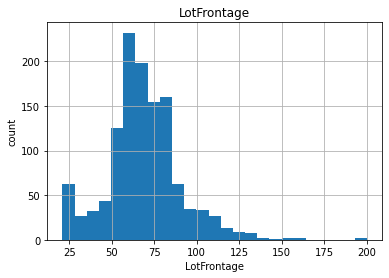

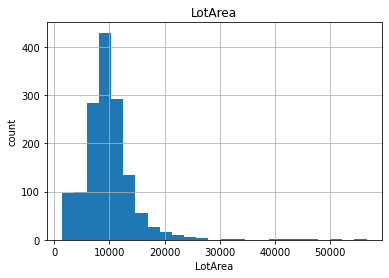

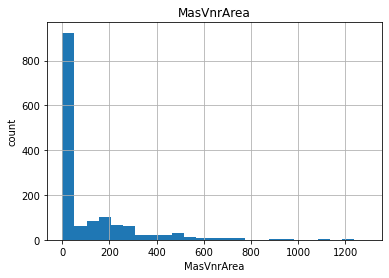

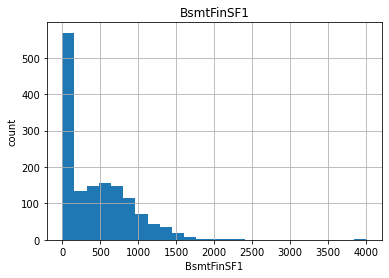

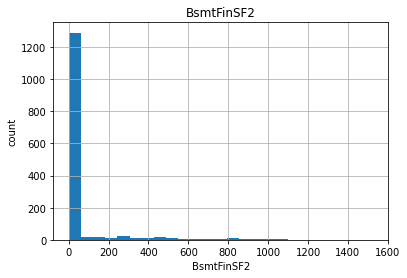

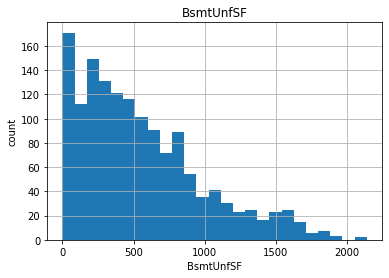

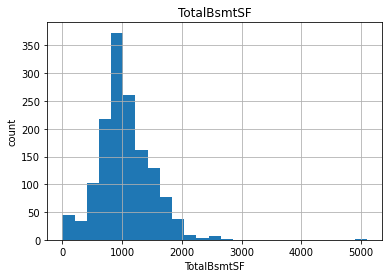

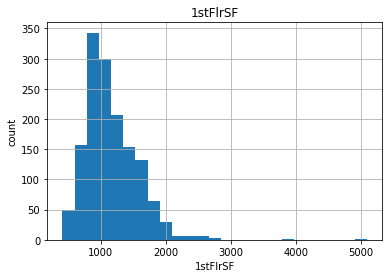

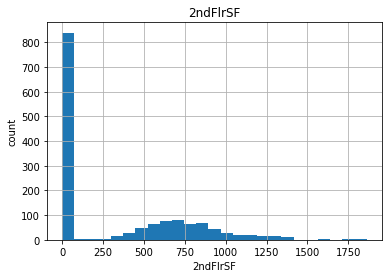

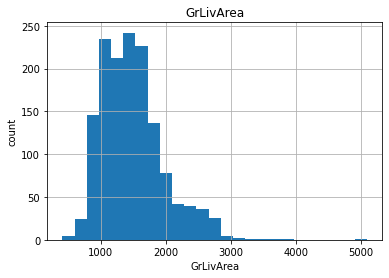

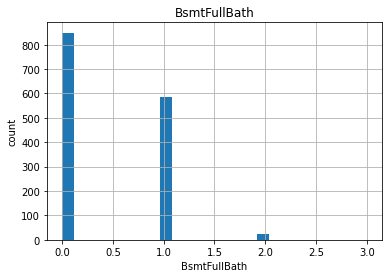

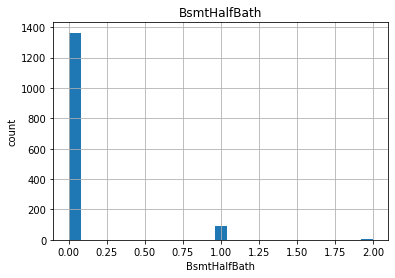

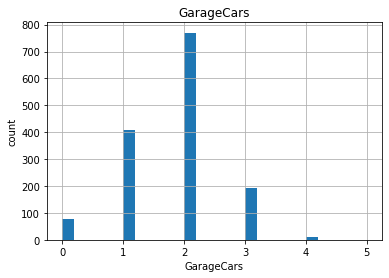

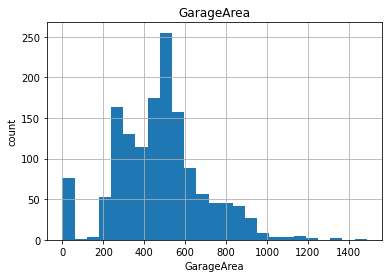

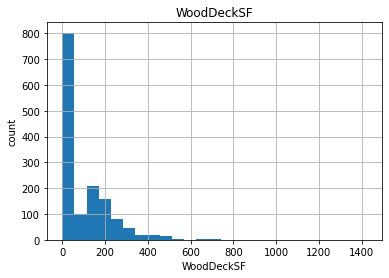

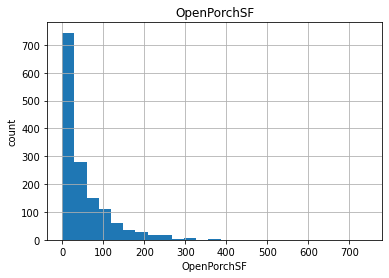

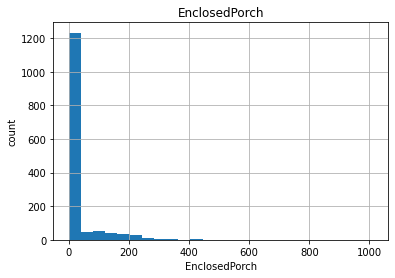

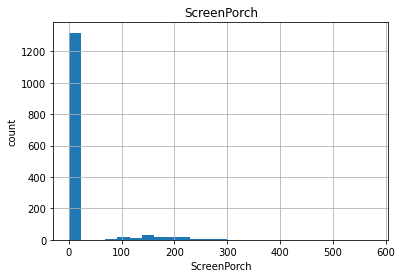

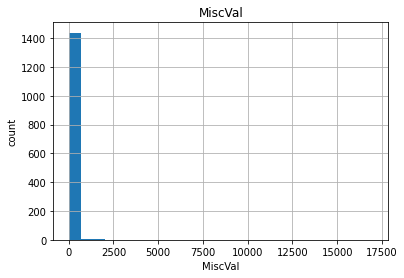

In [75]:
## analyze the continuous values by histograms

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [76]:
## identify the missing data in categorical features

features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtype=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

MSZoning: 0.0027% missing values
Alley: 0.9267% missing values
Utilities: 0.0014% missing values
MasVnrType: 0.011% missing values
BsmtQual: 0.0302% missing values
BsmtCond: 0.0308% missing values
BsmtExposure: 0.0302% missing values
BsmtFinType1: 0.0288% missing values
BsmtFinType2: 0.0288% missing values
Functional: 0.0014% missing values
FireplaceQu: 0.5003% missing values
GarageType: 0.0521% missing values
GarageFinish: 0.0535% missing values
GarageQual: 0.0535% missing values
GarageCond: 0.0535% missing values
PoolQC: 0.9979% missing values
Fence: 0.8012% missing values
MiscFeature: 0.965% missing values


In [77]:
# replace missing values with "missing"

def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna("Missing")
    return data

dataset=replace_cat_feature(dataset,features_nan)
dataset[features_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [78]:
## identify the missing data in numerical features

num_features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtype!='O']

for feature in num_features_nan:
    print(feature,dataset[feature].isnull().mean(),4)

LotFrontage 0.15558601782042494 4
MasVnrArea 0.01028101439342015 4
BsmtFullBath 0.0013708019191226869 4
BsmtHalfBath 0.0013708019191226869 4
GarageYrBlt 0.053461274845784786 4


In [79]:
## replace the missing data in numerical features

for feature in num_features_nan:
    median_value=dataset[feature].median()
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    
    dataset[feature].fillna(median_value, inplace=True)
    
dataset[num_features_nan].isnull().sum()



LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
dtype: int64

In [80]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
                  ..
LotFrontagenan     0
MasVnrAreanan      0
BsmtFullBathnan    0
BsmtHalfBathnan    0
GarageYrBltnan     0
Length: 85, dtype: int64

In [81]:
dataset=dataset.astype({'GarageYrBlt': 'int64'})
dataset['GarageYrBlt'].dtype

dtype('int64')

In [82]:
# handle date and time variables

for feature in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    dataset[feature]=dataset['YrSold']-dataset[feature]



In [83]:
dataset[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,49,49,49
1,52,52,52
2,13,12,13
3,12,12,12
4,18,18,18


In [84]:
# convert cont. features that does not have zero (find them from the histogram), to log normal distribution
req_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in req_features:
    dataset[feature]=np.log(dataset[feature])
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,RH,4.382027,9.360655,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0


In [85]:
## Handle rare categorical feature

categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']
categorical_features



['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [86]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,RH,4.382027,9.360655,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,2010,WD,Normal,0,0,0,0,0
1,1462,20,RL,4.394449,9.565704,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,2010,WD,Normal,0,0,0,0,0
2,1463,60,RL,4.304065,9.534595,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,2010,WD,Normal,0,0,0,0,0
3,1464,60,RL,4.356709,9.208138,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,2010,WD,Normal,0,0,0,0,0
4,1465,120,RL,3.761200,8.518193,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,2010,WD,Normal,0,0,0,0,0


In [87]:
## convert rare variables
for feature in categorical_features:
    temp=dataset.groupby(feature).count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
    

In [88]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder
for feature in categorical_features:
    label_encoder=LabelEncoder()
    dataset[feature]=label_encoder.fit_transform(dataset[feature])

In [89]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,20,3,4.382027,9.360655,1,1,3,3,0,4,0,12,1,2,0,2,5,6,49,49,1,0,11,13,3,0.0,3,4,1,4,4,4,5,468.0,3,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,4,5,7,0,3,1,49,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,3,1,0,6,2010,9,4,0,0,0,0,0
1,1462,20,4,4.394449,9.565704,1,1,0,3,0,0,0,12,2,2,0,2,6,6,52,52,3,0,12,14,1,108.0,3,4,1,4,4,4,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,7,0,3,1,52,3,1.0,312.0,4,5,2,393,36,0,0,0,0,2,2,0,12500,6,2010,9,4,0,0,0,0,0
2,1463,60,4,4.304065,9.534595,1,1,0,3,0,4,0,8,2,2,0,4,5,5,13,12,1,0,11,13,3,0.0,3,4,2,2,4,4,2,791.0,6,0.0,137.0,928.0,0,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,4,6,7,1,5,1,13,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,3,1,0,3,2010,9,4,0,0,0,0,0
3,1464,60,4,4.356709,9.208138,1,1,0,3,0,4,0,8,2,2,0,4,6,6,12,12,1,0,11,13,1,20.0,3,4,2,4,4,4,2,602.0,6,0.0,324.0,926.0,0,0,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,7,1,2,1,12,0,2.0,470.0,4,5,2,360,36,0,0,0,0,2,2,1,0,6,2010,9,4,0,0,0,0,0
4,1465,120,4,3.761200,8.518193,1,1,0,1,0,4,0,22,2,2,4,2,8,5,18,18,1,0,6,6,3,0.0,2,4,2,2,4,4,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,7,0,3,1,18,2,2.0,506.0,4,5,2,0,82,0,0,144,0,2,2,1,0,1,2010,9,4,0,0,0,0,0


In [90]:
# Feature Scaling

feature_scale=[feature for feature in dataset.columns if feature not in ['Id']]


from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [91]:
# direct transform gives data in array
scaler.transform(dataset[feature_scale])

array([[0.        , 0.6       , 0.59344538, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.8       , 0.59895721, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.8       , 0.55885415, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.8       , 0.90099208, ..., 0.        , 0.        ,
        0.        ],
       [0.38235294, 0.8       , 0.48035069, ..., 0.        , 0.        ,
        1.        ],
       [0.23529412, 0.8       , 0.55885415, ..., 0.        , 0.        ,
        0.        ]])

In [92]:
# But we need in data frame format
data=pd.concat([dataset[['Id']].reset_index(drop=True),
                pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
               axis=1)

In [93]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,0.000000,0.6,0.593445,0.566360,1.0,0.5,1.0,1.000000,0.0,1.0,0.0,0.500000,0.125,0.5,0.0,0.333333,0.444444,0.625,0.384615,0.822581,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.000000,1.0,0.2,1.0,1.0,1.0,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.0,0.166667,1.0,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.75,0.333333,0.000000,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0
1,1462,0.000000,0.8,0.598957,0.622527,1.0,0.5,0.0,1.000000,0.0,0.0,0.0,0.500000,0.250,0.5,0.0,0.333333,0.555556,0.625,0.407692,0.870968,0.6,0.0,0.923077,0.933333,0.25,0.083721,1.000000,1.0,0.2,1.0,1.0,1.0,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.5,0.250000,1.0,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.000000,0.735294,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0
2,1463,0.235294,0.8,0.558854,0.614005,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.444444,0.500,0.107692,0.225806,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.000000,1.0,0.4,0.5,1.0,1.0,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.0,0.250000,1.0,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.75,0.333333,0.000000,0.181818,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0
3,1464,0.235294,0.8,0.582212,0.524583,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.555556,0.625,0.100000,0.225806,0.2,0.0,0.846154,0.866667,0.25,0.015504,1.000000,1.0,0.4,1.0,1.0,1.0,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.5,0.333333,1.0,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.333333,0.000000,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0
4,1465,0.588235,0.8,0.317987,0.335596,1.0,0.5,0.0,0.333333,0.0,1.0,0.0,0.916667,0.250,0.5,1.0,0.333333,0.777778,0.500,0.146154,0.322581,0.2,0.0,0.461538,0.400000,0.75,0.000000,0.666667,1.0,0.4,0.5,1.0,1.0,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.5,0.166667,1.0,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,0.50,0.333333,0.000000,0.000000,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0


In [94]:
selected_features=['MSZoning', 'LotShape', 'BldgType', 'OverallQual', 'YearRemodAdd',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'PavedDrive']

In [95]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan
0,1461,0.000000,0.6,0.593445,0.566360,1.0,0.5,1.0,1.000000,0.0,1.0,0.0,0.500000,0.125,0.5,0.0,0.333333,0.444444,0.625,0.384615,0.822581,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.000000,1.0,0.2,1.0,1.0,1.0,0.833333,0.116708,0.5,0.094364,0.126168,0.173111,0.0,1.0,1.0,1.0,0.312253,0.000000,0.0,0.312253,0.0,0.0,0.25,0.0,0.333333,0.5,1.0,0.166667,1.0,0.00,0.6,0.166667,0.792994,1.000000,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,1.0,0.75,0.333333,0.000000,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0
1,1462,0.000000,0.8,0.598957,0.622527,1.0,0.5,0.0,1.000000,0.0,0.0,0.0,0.500000,0.250,0.5,0.0,0.333333,0.555556,0.625,0.407692,0.870968,0.6,0.0,0.923077,0.933333,0.25,0.083721,1.000000,1.0,0.2,1.0,1.0,1.0,0.000000,0.230175,1.0,0.000000,0.189720,0.260844,0.0,1.0,1.0,1.0,0.468253,0.000000,0.0,0.468253,0.0,0.0,0.25,0.5,0.500000,0.5,0.5,0.250000,1.0,0.00,0.6,0.166667,0.802548,1.000000,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.000000,0.735294,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0
2,1463,0.235294,0.8,0.558854,0.614005,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.444444,0.500,0.107692,0.225806,0.2,0.0,0.846154,0.866667,0.75,0.000000,1.000000,1.0,0.4,0.5,1.0,1.0,0.333333,0.197257,1.0,0.000000,0.064019,0.182139,0.0,0.5,1.0,1.0,0.326139,0.376477,0.0,0.548792,0.0,0.0,0.50,0.5,0.500000,0.5,1.0,0.250000,1.0,0.25,1.0,0.166667,0.678344,0.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,1.0,0.75,0.333333,0.000000,0.181818,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0
3,1464,0.235294,0.8,0.582212,0.524583,1.0,0.5,0.0,1.000000,0.0,1.0,0.0,0.333333,0.250,0.5,0.0,0.666667,0.555556,0.625,0.100000,0.225806,0.2,0.0,0.846154,0.866667,0.25,0.015504,1.000000,1.0,0.4,1.0,1.0,1.0,0.333333,0.150125,1.0,0.000000,0.151402,0.181747,0.0,0.0,1.0,1.0,0.325285,0.364125,0.0,0.542672,0.0,0.0,0.50,0.5,0.500000,0.5,0.5,0.333333,1.0,0.25,0.4,0.166667,0.675159,0.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,1.0,0.50,0.333333,0.000000,0.454545,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0
4,1465,0.588235,0.8,0.317987,0.335596,1.0,0.5,0.0,0.333333,0.0,1.0,0.0,0.916667,0.250,0.5,1.0,0.333333,0.777778,0.500,0.146154,0.322581,0.2,0.0,0.461538,0.400000,0.75,0.000000,0.666667,1.0,0.4,0.5,1.0,1.0,0.000000,0.065586,1.0,0.000000,0.475234,0.251227,0.0,0.0,1.0,1.0,0.453388,0.000000,0.0,0.453388,0.0,0.0,0.50,0.0,0.333333,0.5,0.5,0.166667,1.0,0.00,0.6,0.166667,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,1.0,0.50,0.333333,0.000000,0.000000,1.0,1.0,0.8,0.0,0.0,0.0,0.0,0.0


In [96]:
data=data[selected_features]
data.head()

,MSZoning,LotShape,BldgType,OverallQual,YearRemodAdd,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive
0,0.6,1.0,0.0,0.444444,0.822581,1.000000,1.0,1.0,0.833333,1.0,1.0,0.312253,0.312253,0.0,1.0,0.00,0.166667,1.000000,0.2,1.0
1,0.8,0.0,0.0,0.555556,0.870968,1.000000,1.0,1.0,0.000000,1.0,1.0,0.468253,0.468253,0.0,0.5,0.00,0.166667,1.000000,0.2,1.0
2,0.8,0.0,0.0,0.444444,0.225806,1.000000,0.5,1.0,0.333333,0.5,1.0,0.326139,0.548792,0.0,1.0,0.25,0.166667,0.000000,0.4,1.0
3,0.8,0.0,0.0,0.555556,0.225806,1.000000,1.0,1.0,0.333333,0.0,1.0,0.325285,0.542672,0.0,0.5,0.25,0.166667,0.000000,0.4,1.0
4,0.8,0.0,1.0,0.777778,0.322581,0.666667,0.5,1.0,0.000000,0.0,1.0,0.453388,0.453388,0.0,0.5,0.00,0.166667,0.666667,0.4,1.0


In [97]:
data.to_csv('X_test.csv', index=False)